In [61]:
## MP 573 Lecture 11: DFT and FFT
##
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
import matplotlib.image as mpimg
from os.path import dirname, join as pjoin
import scipy.io as sio
import scipy.linalg as lin

font = {'weight' : 'normal',
        'size'   : 20}

## The Discrete Fourier Transform (DFT)

The DFT of a length-$M$ sequence $f[m]$ (for $m=0,1,\ldots,M-1$) is defined as:

$$\hat{f}[k] = \sum_{m=0}^{M-1} f[m] e^{-i 2 \pi \frac{mk}{M}}$$


Analogously to the DFT, the inverse DFT (iDFT) is defined as:

$$f[m] = \frac{1}{M} \sum_{k=0}^{M-1} \hat{f}[k] e^{i 2 \pi \frac{mk}{M}}$$


In [39]:
## Let's create a length-2 signal
g = np.array([3.0, 5.0])
g

array([3., 5.])

In [40]:
## Calculate DFT
ghat = np.fft.fft(g)
ghat

array([ 8.+0.j, -2.+0.j])

In [44]:
## Calculate DFT elements one at a time
ghat1 = np.zeros([2])
ghat1[0] = 1*g[0] + 1*g[1]
ghat1[1] = 1*g[0] - 1*g[1]
ghat1

array([ 8., -2.])

In [54]:
## Create DFT matrix (size 2)
F = lin.dft(2)
InvF = lin.inv(F)
A = np.matmul(F.T,F)

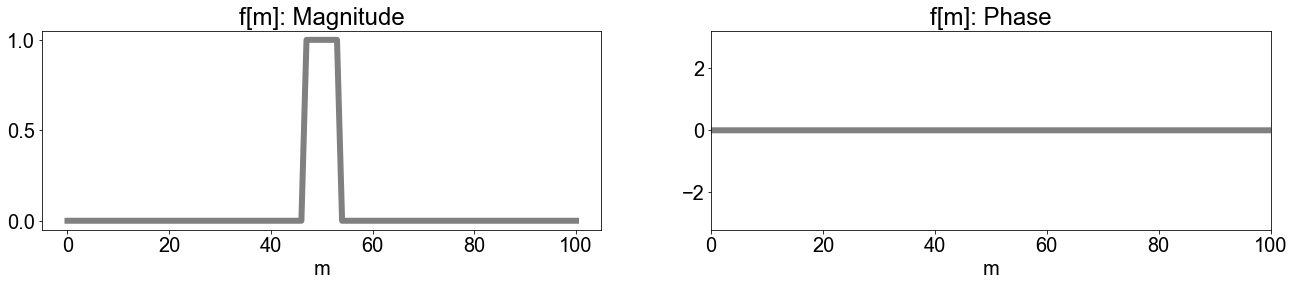

In [88]:
# Let's plot a signal and its FT
M = 101
xmax = 8
x = np.linspace(-xmax,xmax,M)
dx = x[1] - x[0]
f = 1.0*(np.abs(x)<0.5)*np.exp(-1j*0.0001)

# Plot f: magnitude and phase
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.rc('font', **font)
plt.plot(np.abs(f),'gray',linewidth=6.0)
plt.title('f[m]: Magnitude')
plt.xlabel('m')
plt.subplot(1,2,2)
plt.rc('font', **font)
plt.plot(np.angle(f),'gray',linewidth=6.0)
plt.title('f[m]: Phase')
plt.xlabel('m')
plt.axis([0,M-1,-3.2,3.2])
plt.tight_layout(pad=4.0)

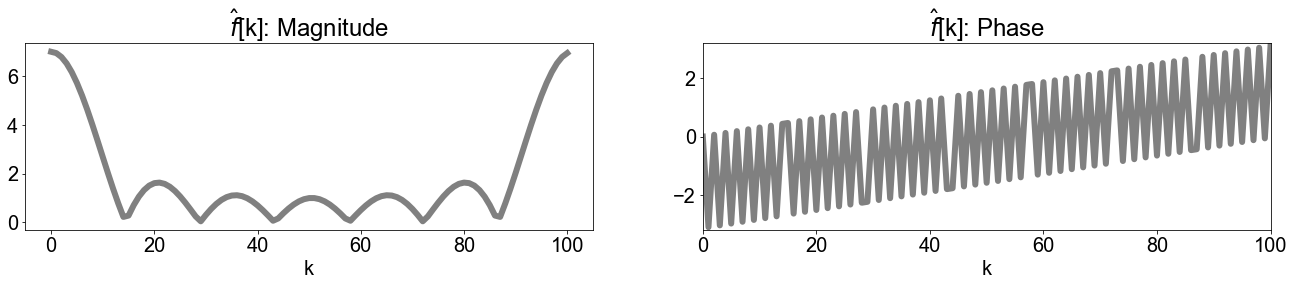

In [89]:
# Calculate a (discrete) Fourier transform
fhat = np.fft.fft(f)

# Plot fhat: magnitude and phase
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.rc('font', **font)
plt.plot(np.abs(fhat),'gray',linewidth=6.0)
plt.xlabel('k')
plt.title('$\hat{f}$[k]: Magnitude')
plt.subplot(1,2,2)
plt.rc('font', **font)
plt.plot(np.angle(fhat),'gray',linewidth=6.0)
plt.title('$\hat{f}$[k]: Phase')
plt.xlabel('k')
plt.axis([0,M-1,-3.2,3.2])
plt.tight_layout(pad=4.0)

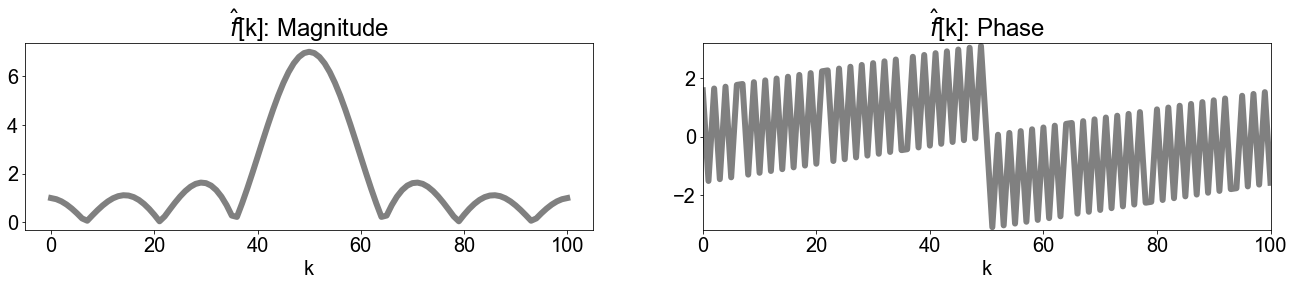

In [90]:
# Calculate a (discrete) Fourier transform
fhat = np.fft.fftshift(np.fft.fft(f))

# Plot fhat: magnitude and phase
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.rc('font', **font)
plt.plot(np.abs(fhat),'gray',linewidth=6.0)
plt.xlabel('k')
plt.title('$\hat{f}$[k]: Magnitude')
plt.subplot(1,2,2)
plt.rc('font', **font)
plt.plot(np.angle(fhat),'gray',linewidth=6.0)
plt.title('$\hat{f}$[k]: Phase')
plt.xlabel('k')
plt.axis([0,M-1,-3.2,3.2])
plt.tight_layout(pad=4.0)

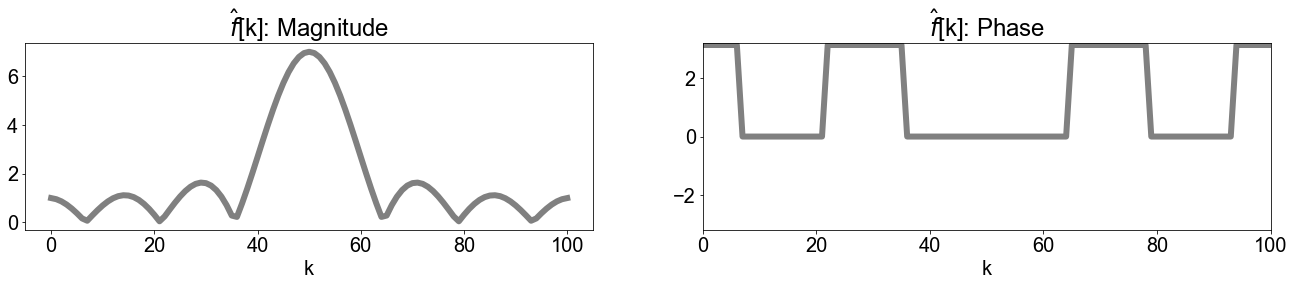

In [91]:
# Calculate a (discrete) Fourier transform
fhat = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(f)))

# Plot fhat: magnitude and phase
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.rc('font', **font)
plt.plot(np.abs(fhat),'gray',linewidth=6.0)
plt.xlabel('k')
plt.title('$\hat{f}$[k]: Magnitude')
plt.subplot(1,2,2)
plt.rc('font', **font)
plt.plot(np.angle(fhat),'gray',linewidth=6.0)
plt.title('$\hat{f}$[k]: Phase')
plt.xlabel('k')
plt.axis([0,M-1,-3.2,3.2])
plt.tight_layout(pad=4.0)

## Q1: Computational complexity

How many (complex scalar) multiplication operations, each of them the product of a vector entry times a complex exponential, are needed to calculate a length-M DFT by directly applying the definition in Equation 11.1? 

A: $0$ 

B: $1$

C: $M$

D: $M^2$

## Q2: DFT matrix

If $\mathbf{F}$ is a length-M DFT matrix (say, $M=4$, although this does not matter), what is the value of the off-diagonal elements (ie: the elements not on the diagonal) of the matrix $\mathbf{F}^H \mathbf{F}$?

Note that $^H$ denotes conjugate transpose.

If you choose to check your answer computationally, make sure you account for numerical limitations of Python. 

A: $0$ 

B: $1$

C: $M$

D: $M^2$

## Q3: Complex exponentials for representing finite discrete signals

Based on the inverse DFT expression, we can express any length-M signal as a combination of discrete complex exponentials "basis vectors". Consider the complex exponential basis vector $\mathbf{v_k}$ such that each entry $m$ ($m=0,1,\ldots,M-1$) in our vector is $ v_k[m] = e^{i 2 \pi \frac{mk}{M}}$, for some fixed integer $k$. How many cycles in the complex plane does each entry in $\mathbf{v}$ advance? In other words, what is the phase difference, in cycles, between $v_k[3]$ and $v_k[4]$? This can be viewed as the discrete frequency of our basis vector, in cycles/sample. 

A: 0

B: 1

C: $k/M$

D: $M$